In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("../data/processed/all_cleaned_data.csv")

In [3]:
data.head()

,DATE,WATER_LEVEL,HUMIDITY,MEAN_TEMP,PRECIPITATION,PRESSURE,SNOW_DEPTH,SUNSHINE,WIND_SPEED,GLOBAL_RADIATION,GROUNDWATER_LEVEL,MOON_ILLUMINATION,CLIMATE_CHANGE
0,1924-01-01,326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.59370,NaN
1,1924-01-02,326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.81860,NaN
2,1924-01-03,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.12037,NaN
3,1924-01-04,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15906,NaN
4,1924-01-05,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50409,NaN


In [4]:
# Shift the water level and date column to create the target for prediction (predict target of tomorrow with features of yesterday)
data['WATER_LEVEL'] = data['WATER_LEVEL'].shift(-1)
data['DATE'] = data['DATE'].shift(-1)

In [5]:
#verify shift
data.head()

,DATE,WATER_LEVEL,HUMIDITY,MEAN_TEMP,PRECIPITATION,PRESSURE,SNOW_DEPTH,SUNSHINE,WIND_SPEED,GLOBAL_RADIATION,GROUNDWATER_LEVEL,MOON_ILLUMINATION,CLIMATE_CHANGE
0,1924-01-02,326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.59370,NaN
1,1924-01-03,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.81860,NaN
2,1924-01-04,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.12037,NaN
3,1924-01-05,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15906,NaN
4,1924-01-06,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.50409,NaN


In [6]:
#as water level of today depends on water level of yesterday: add Lags becuase:
#Lag enables analysts to understand how current data points are related to previous ones. (source: https://www.geeksforgeeks.org/what-is-lag-in-time-series-forecasting/)
# Add lagged features for 1 week
lags = [1, 2, 3, 4, 5, 6, 7]
for lag in lags:
    data[f'WATER_LEVEL_LAG_{lag}'] = data['WATER_LEVEL'].shift(lag)

# Display the dataset with lagged features
print(data.head())

         DATE  WATER_LEVEL  HUMIDITY  MEAN_TEMP  PRECIPITATION  PRESSURE  \
0  1924-01-02        326.0       NaN        NaN            NaN       NaN   
1  1924-01-03        324.0       NaN        NaN            NaN       NaN   
2  1924-01-04        324.0       NaN        NaN            NaN       NaN   
3  1924-01-05        324.0       NaN        NaN            NaN       NaN   
4  1924-01-06        323.0       NaN        NaN            NaN       NaN   

   SNOW_DEPTH  SUNSHINE  WIND_SPEED  GLOBAL_RADIATION  GROUNDWATER_LEVEL  \
0         NaN       NaN         NaN               NaN                NaN   
1         NaN       NaN         NaN               NaN                NaN   
2         NaN       NaN         NaN               NaN                NaN   
3         NaN       NaN         NaN               NaN                NaN   
4         NaN       NaN         NaN               NaN                NaN   

   MOON_ILLUMINATION  CLIMATE_CHANGE  WATER_LEVEL_LAG_1  WATER_LEVEL_LAG_2  \
0       

In [7]:

data['DATE'] = pd.to_datetime(data['DATE'])

# Filter the data for the specified time span
filtered_data = data[(data['DATE'] >= '1973-01-01') & (data['DATE'] <= '2023-12-31')]

In [8]:
filtered_data


,DATE,WATER_LEVEL,HUMIDITY,MEAN_TEMP,PRECIPITATION,PRESSURE,SNOW_DEPTH,SUNSHINE,WIND_SPEED,GLOBAL_RADIATION,GROUNDWATER_LEVEL,MOON_ILLUMINATION,CLIMATE_CHANGE,WATER_LEVEL_LAG_1,WATER_LEVEL_LAG_2,WATER_LEVEL_LAG_3,WATER_LEVEL_LAG_4,WATER_LEVEL_LAG_5,WATER_LEVEL_LAG_6,WATER_LEVEL_LAG_7
17897,1973-01-01,280.0,76.0,-22.0,0.0,10291.0,0.0,75.0,7.0,73.0,413.93,18.48788,-0.061,282.0,283.0,285.0,287.0,289.0,292.0,294.0
17898,1973-01-02,279.0,83.0,-25.0,0.0,10263.0,0.0,23.0,10.0,46.0,413.93,11.76654,-0.056,280.0,282.0,283.0,285.0,287.0,289.0,292.0
17899,1973-01-03,278.0,83.0,-9.0,0.0,10288.0,0.0,21.0,6.0,45.0,413.93,6.38749,-0.056,279.0,280.0,282.0,283.0,285.0,287.0,289.0
17900,1973-01-04,277.0,80.0,0.0,0.0,10297.0,0.0,11.0,11.0,37.0,413.93,2.54398,-0.056,278.0,279.0,280.0,282.0,283.0,285.0,287.0
17901,1973-01-05,275.0,83.0,-1.0,0.0,10331.0,0.0,8.0,21.0,34.0,413.93,0.40753,-0.056,277.0,278.0,279.0,280.0,282.0,283.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36519,2023-12-27,392.0,78.0,62.0,0.0,10207.0,0.0,38.0,29.0,49.0,414.13,98.74708,2.742,395.0,397.0,399.0,400.0,400.0,402.0,406.0
36520,2023-12-28,388.0,94.0,16.0,0.0,10242.0,0.0,7.0,10.0,38.0,414.13,99.82594,2.742,392.0,395.0,397.0,399.0,400.0,400.0,402.0
36521,2023-12-29,385.0,95.0,17.0,0.0,10233.0,0.0,0.0,11.0,21.0,414.13,98.83705,2.742,388.0,392.0,395.0,397.0,399.0,400.0,400.0
36522,2023-12-30,380.0,80.0,78.0,2.0,10202.0,0.0,6.0,22.0,32.0,414.13,95.93684,2.742,385.0,388.0,392.0,395.0,397.0,399.0,400.0


In [9]:
print("Filtered data set:", filtered_data.shape)

Filtered data set: (18627, 20)


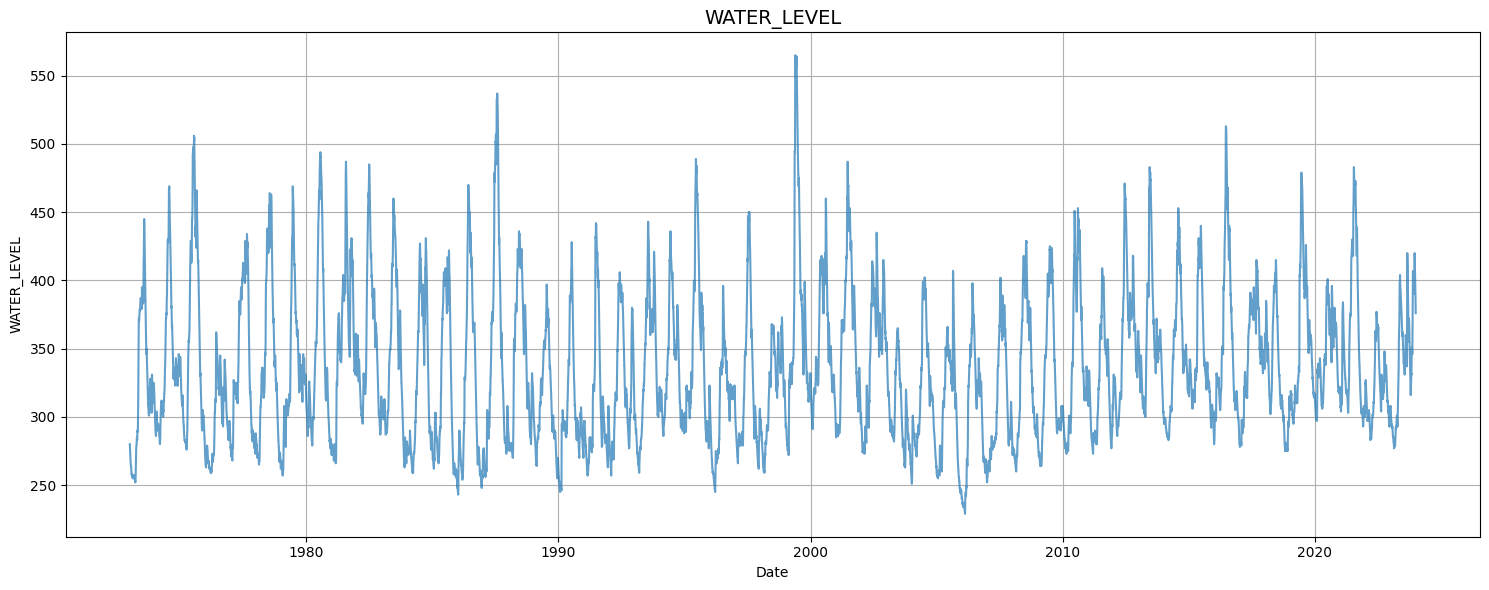

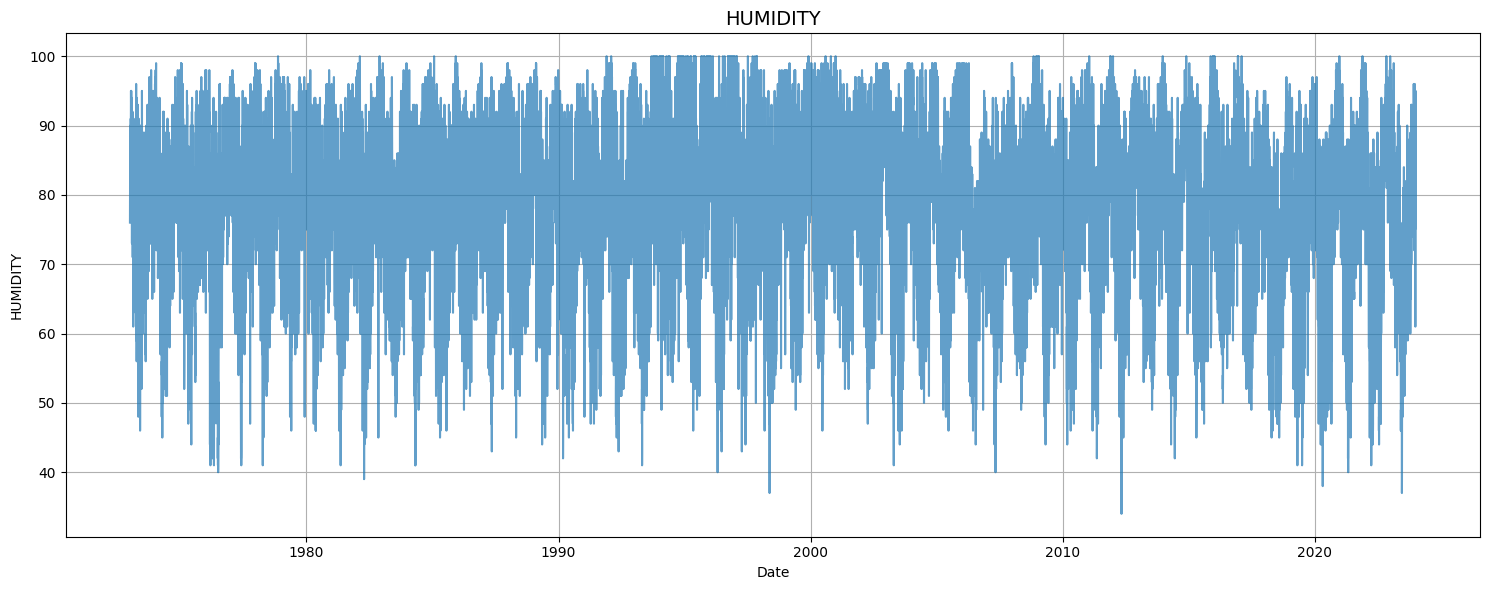

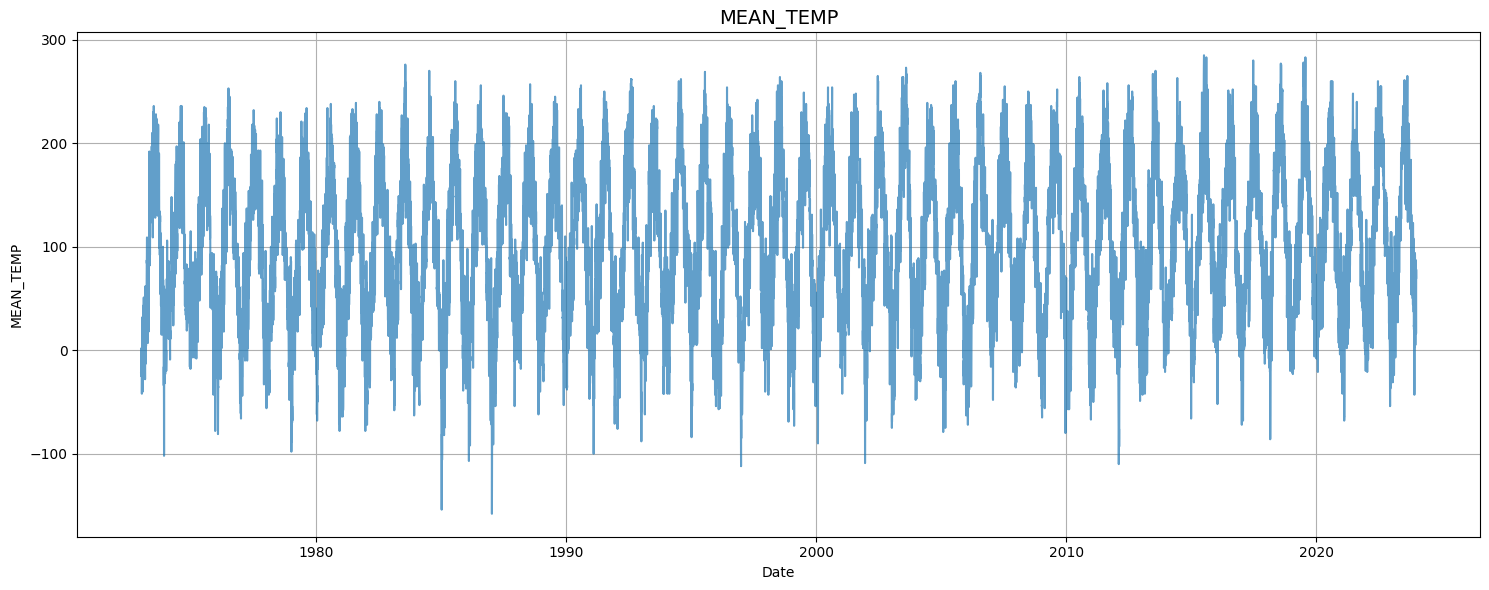

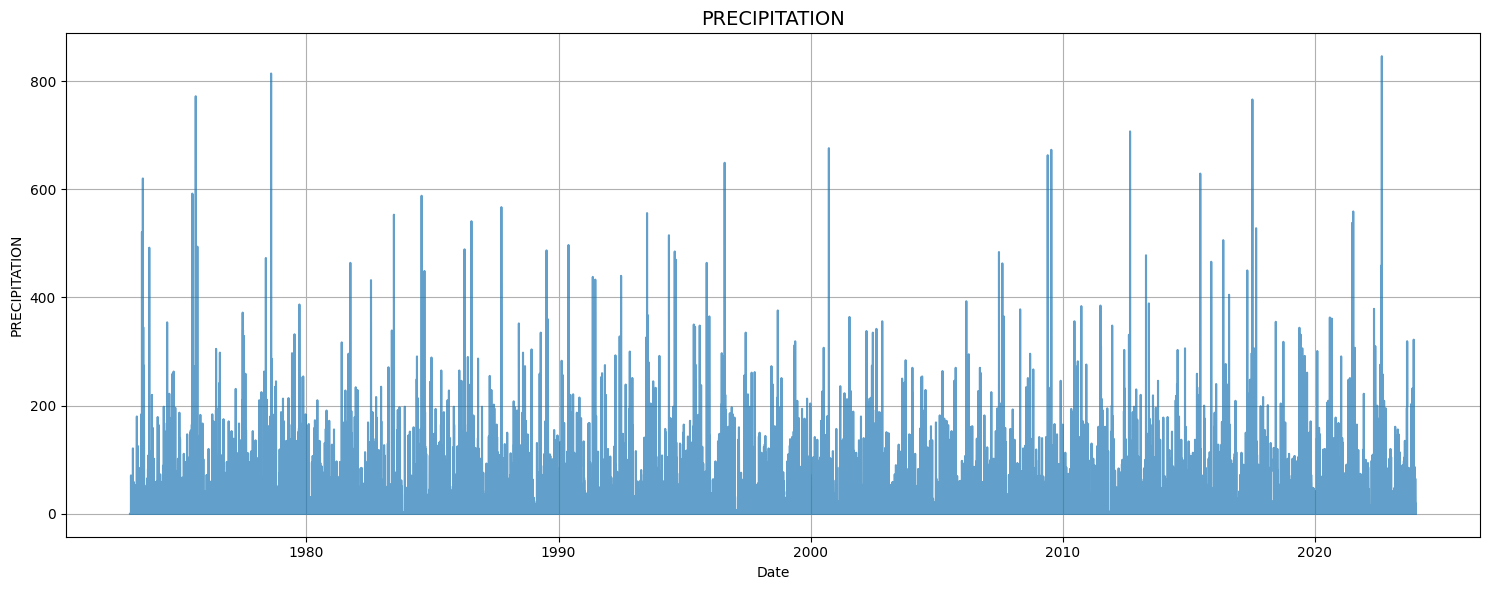

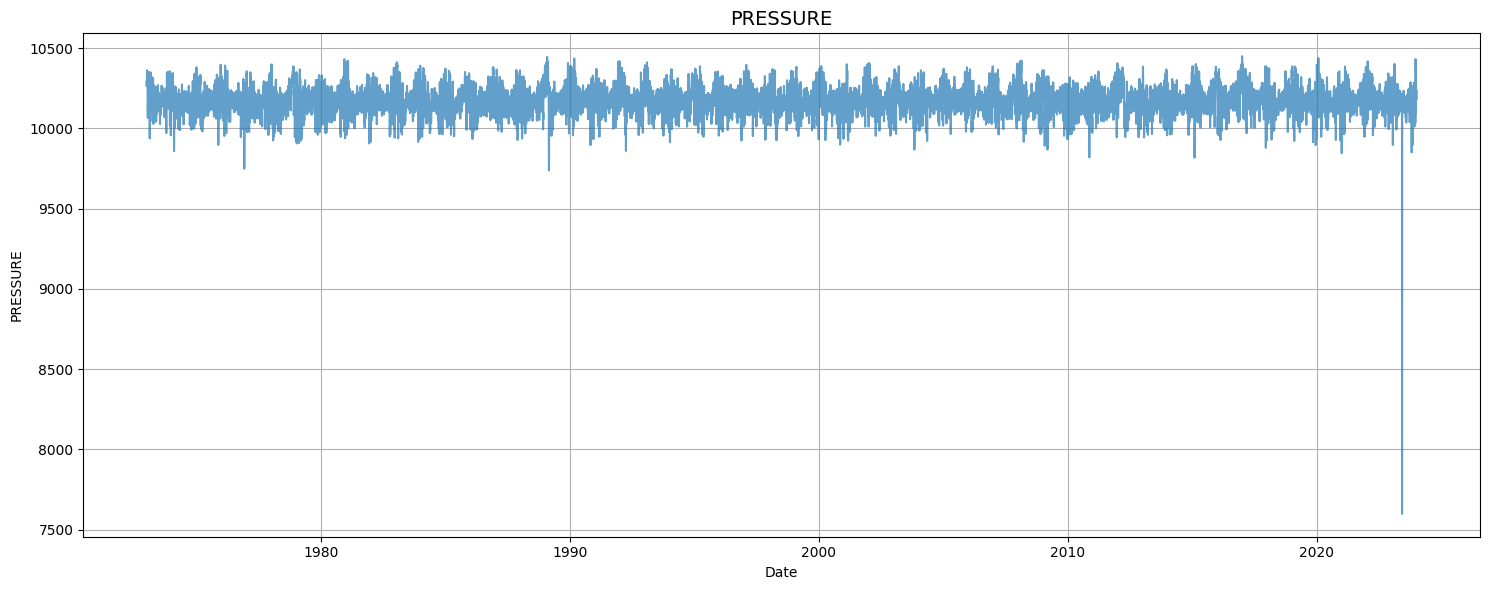

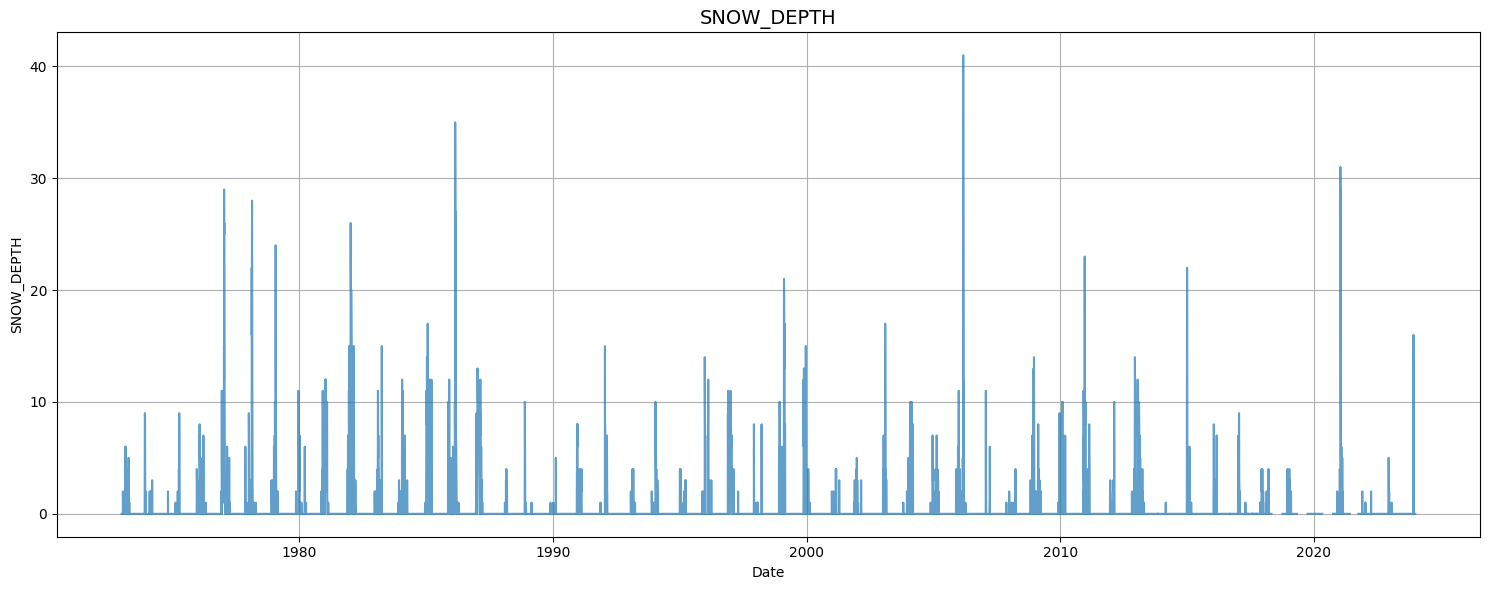

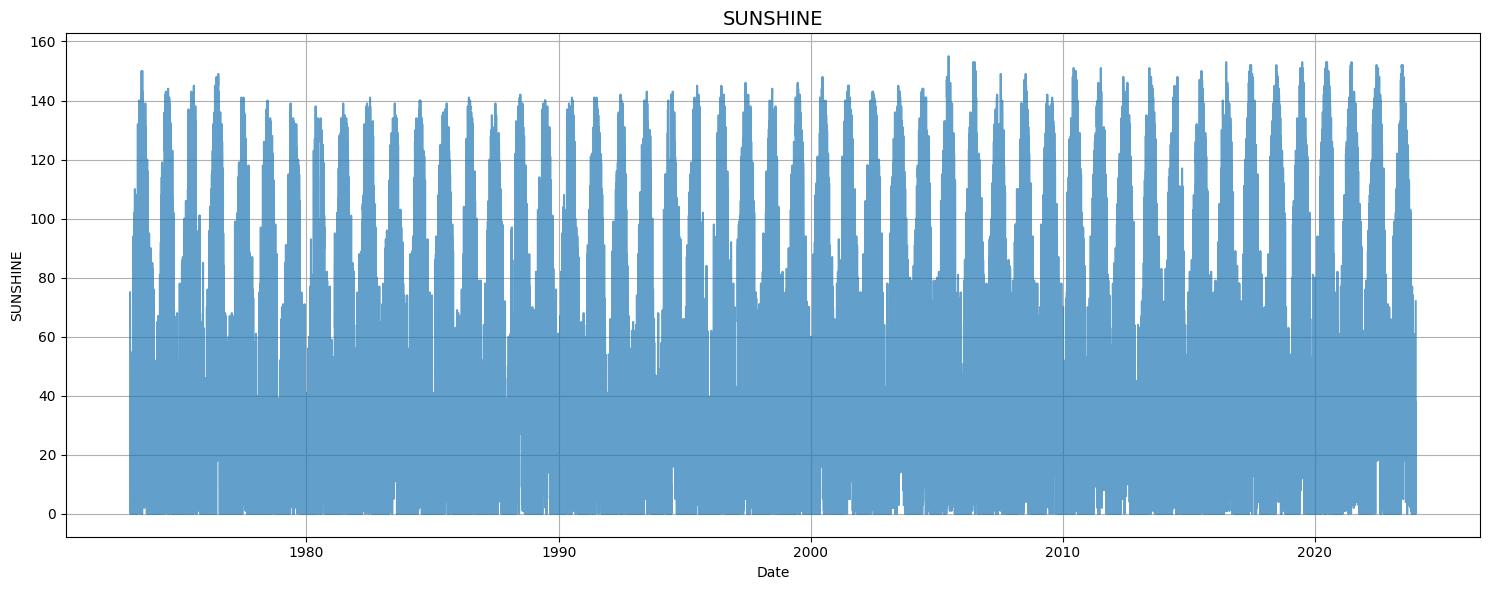

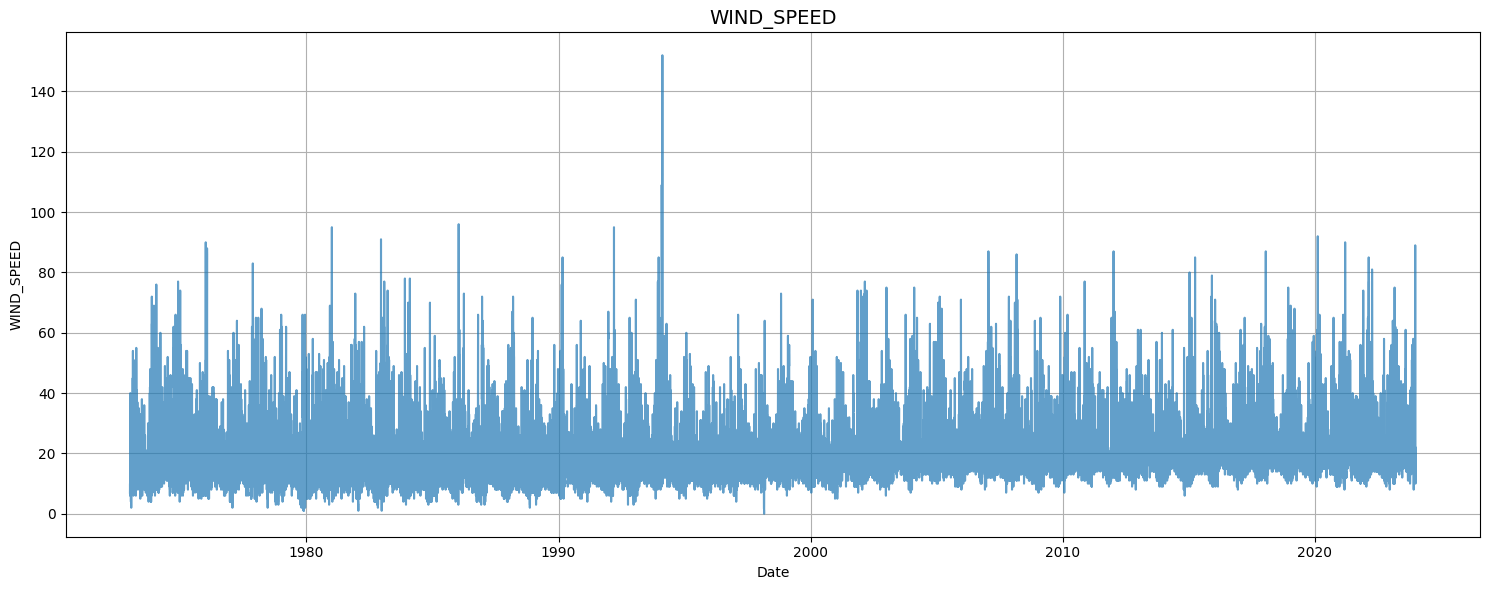

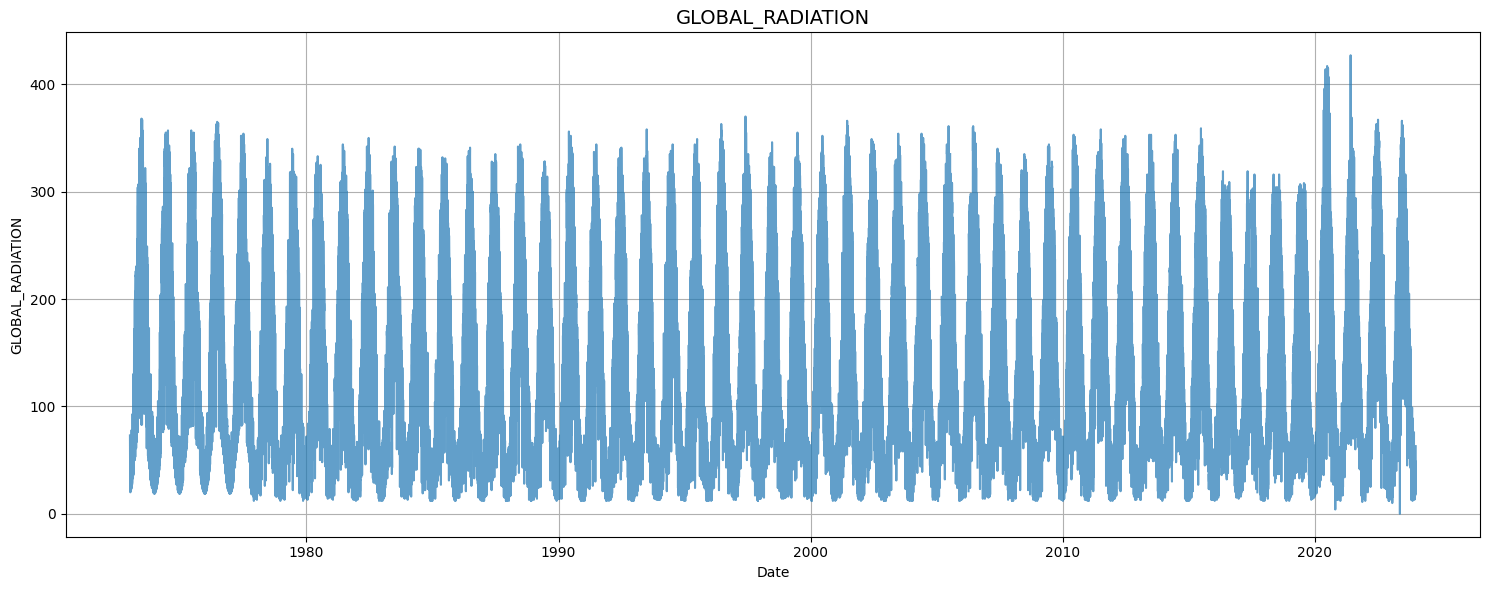

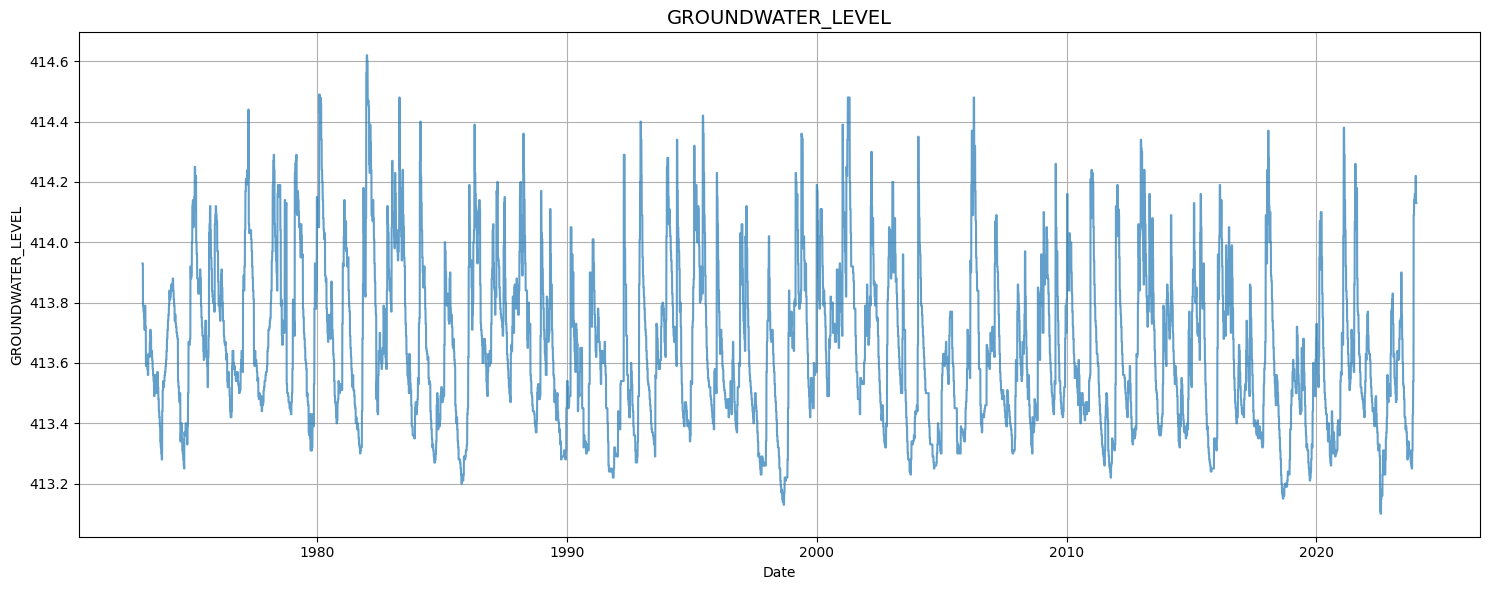

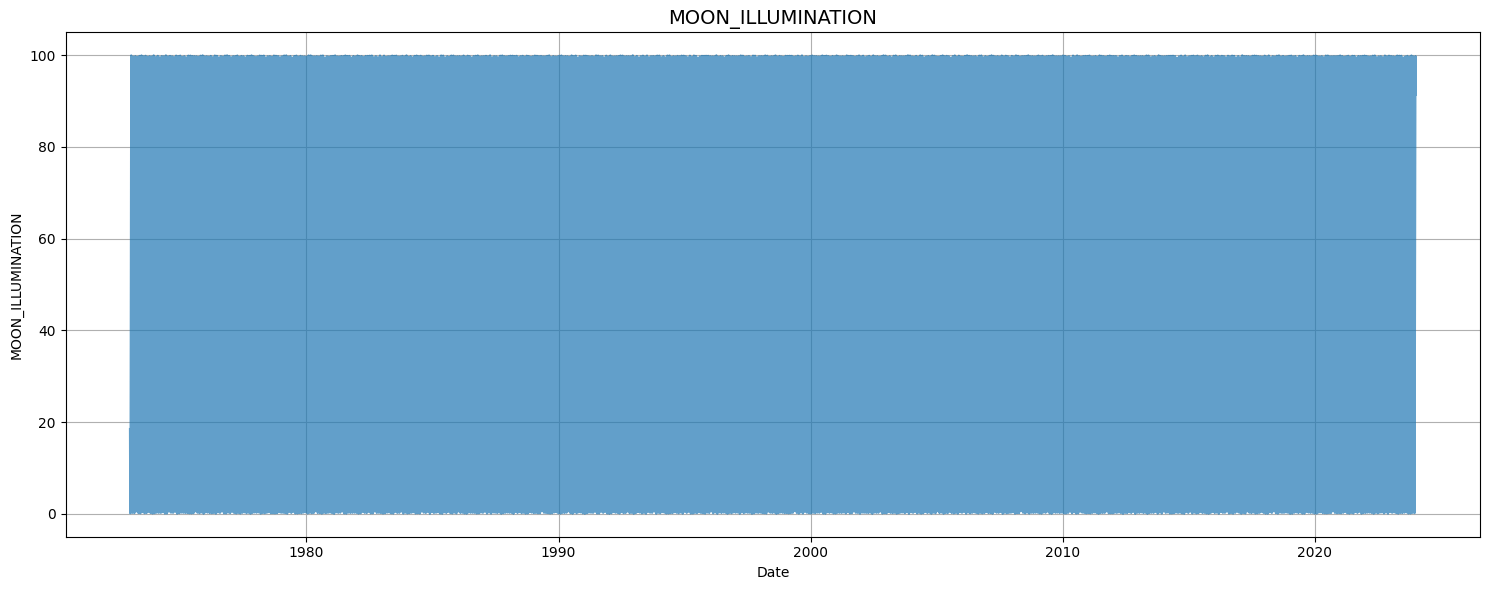

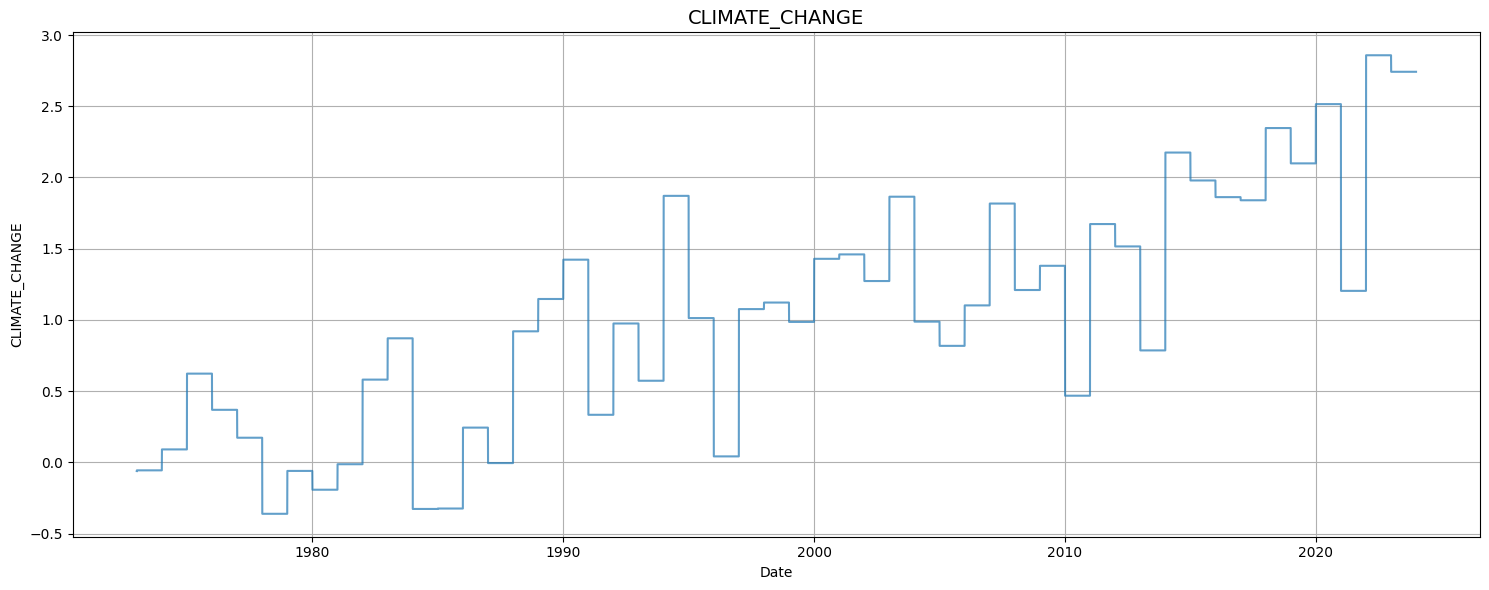

In [10]:
#plot to search for outliers:
import matplotlib.pyplot as plt

filtered_data.set_index('DATE', inplace=True)

# Exclude the last 7 columns (are the lagged ones so have them already in water levels)
columns_to_plot = filtered_data.columns[:-7]

# Create a separate plot for each column
for column in columns_to_plot:
    plt.figure(figsize=(15, 6))
    plt.plot(filtered_data.index, filtered_data[column], alpha=0.7)
    plt.title(f"{column}", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
#see clear outlier in wind speed and percpressure
#and data around 2020 looks weird -> look at it again

In [ ]:
#need date as column again:
filtered_data.reset_index(inplace=True)

In [ ]:
print(filtered_data.columns)


Index(['DATE', 'WATER_LEVEL', 'HUMIDITY', 'MEAN_TEMP', 'PRECIPITATION',
       'PRESSURE', 'SNOW_DEPTH', 'SUNSHINE', 'WIND_SPEED', 'GLOBAL_RADIATION',
       'GROUNDWATER_LEVEL', 'MOON_ILLUMINATION', 'CLIMATE_CHANGE',
       'WATER_LEVEL_LAG_1', 'WATER_LEVEL_LAG_2', 'WATER_LEVEL_LAG_3',
       'WATER_LEVEL_LAG_4', 'WATER_LEVEL_LAG_5', 'WATER_LEVEL_LAG_6',
       'WATER_LEVEL_LAG_7'],
      dtype='object')


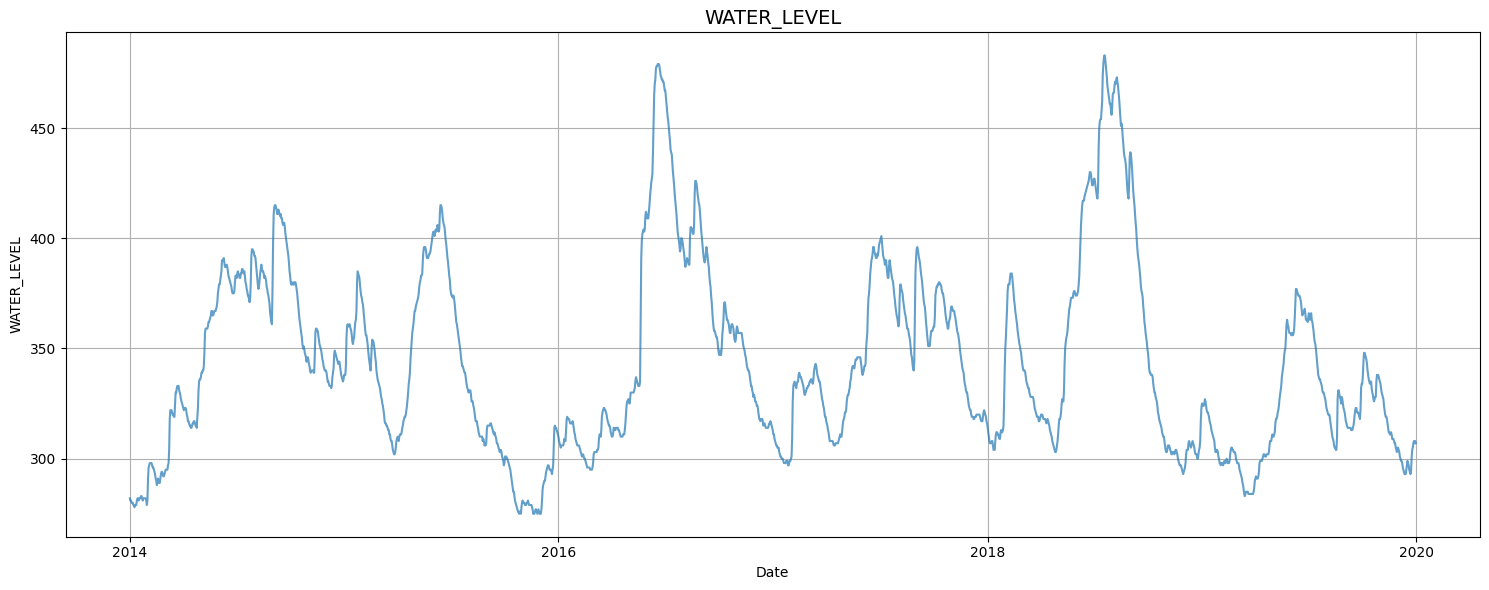

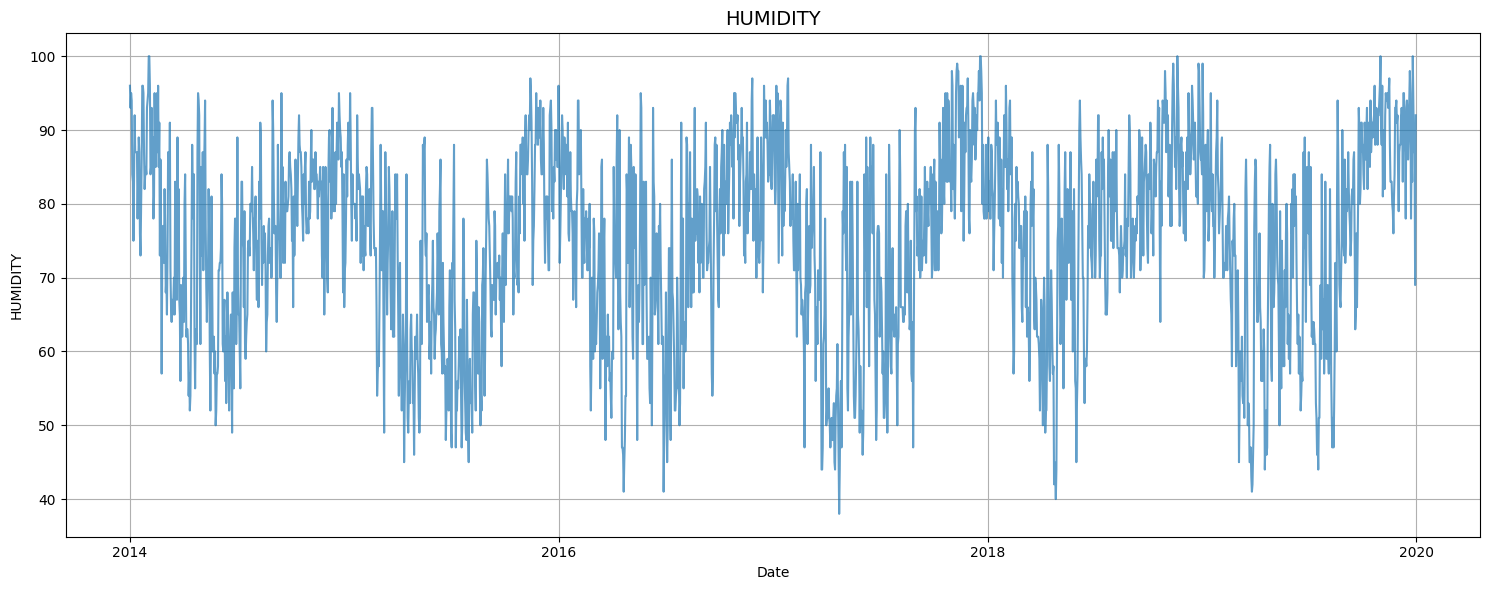

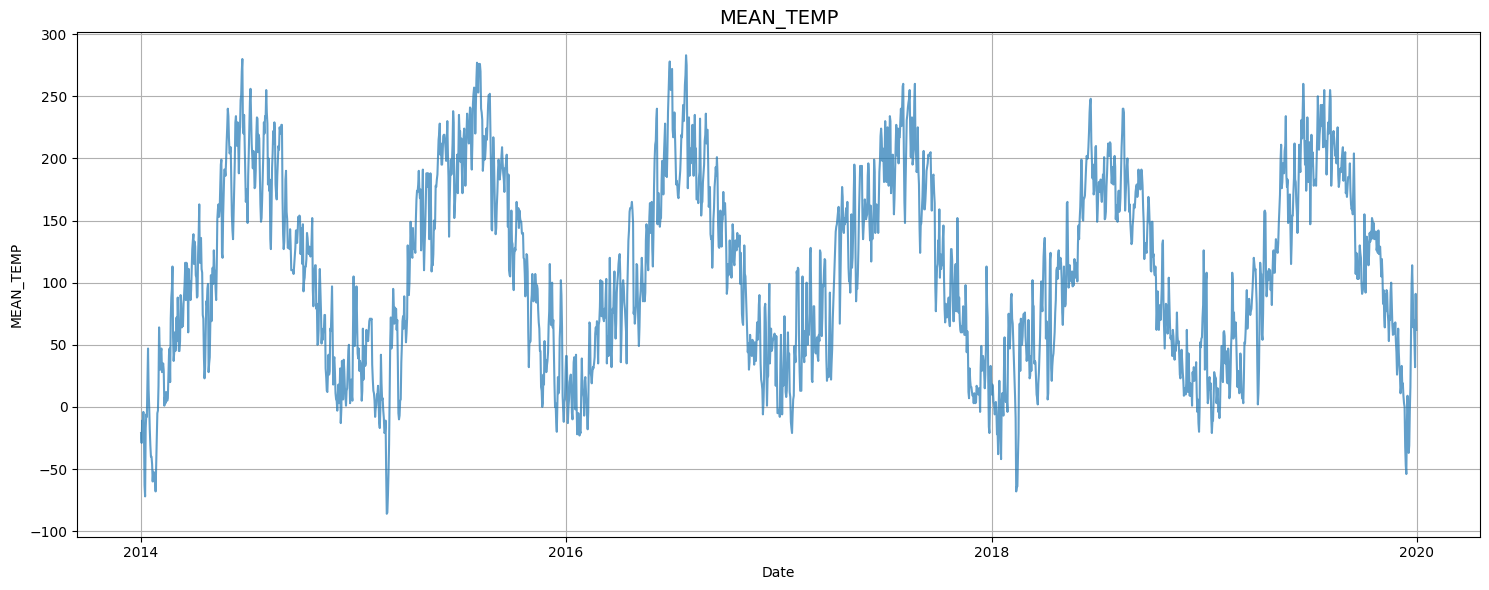

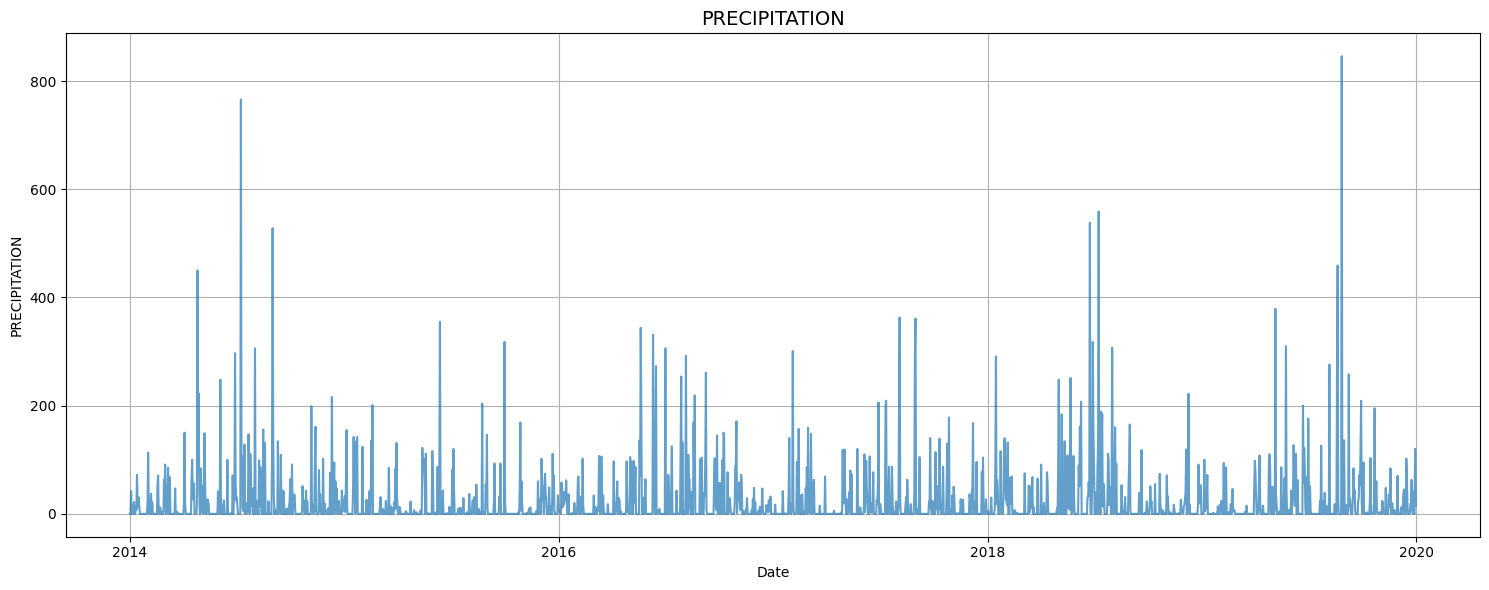

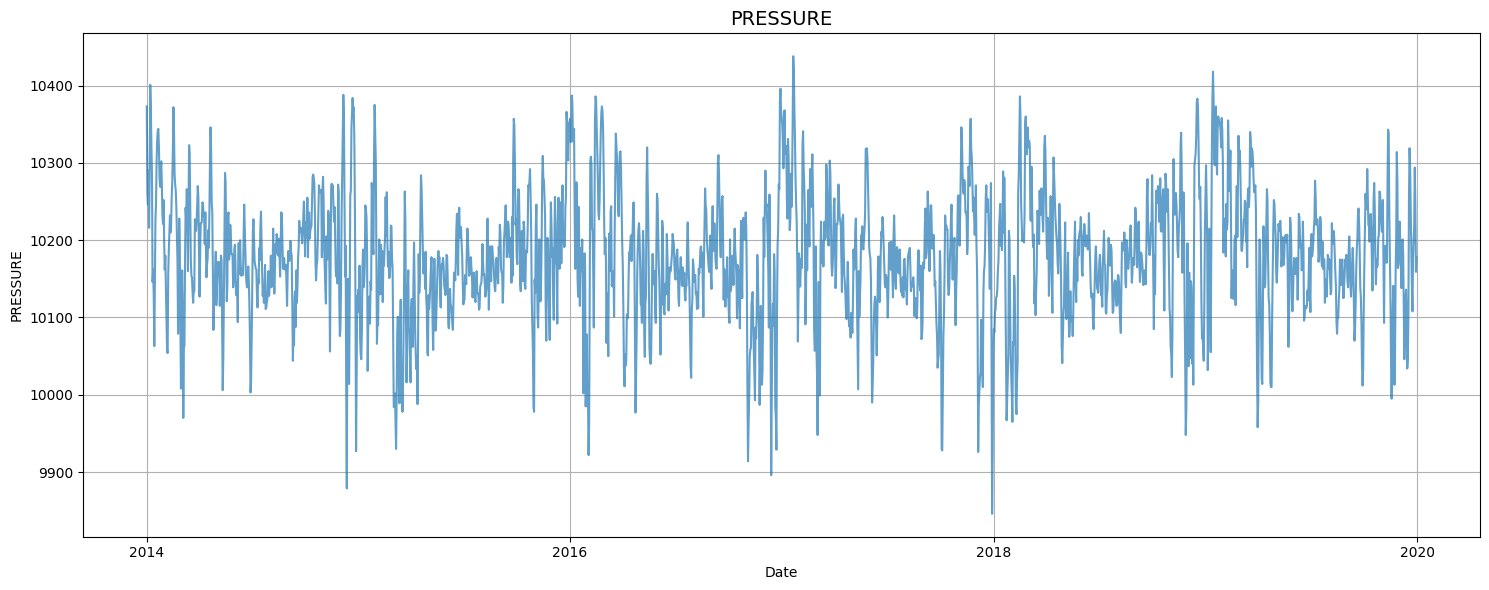

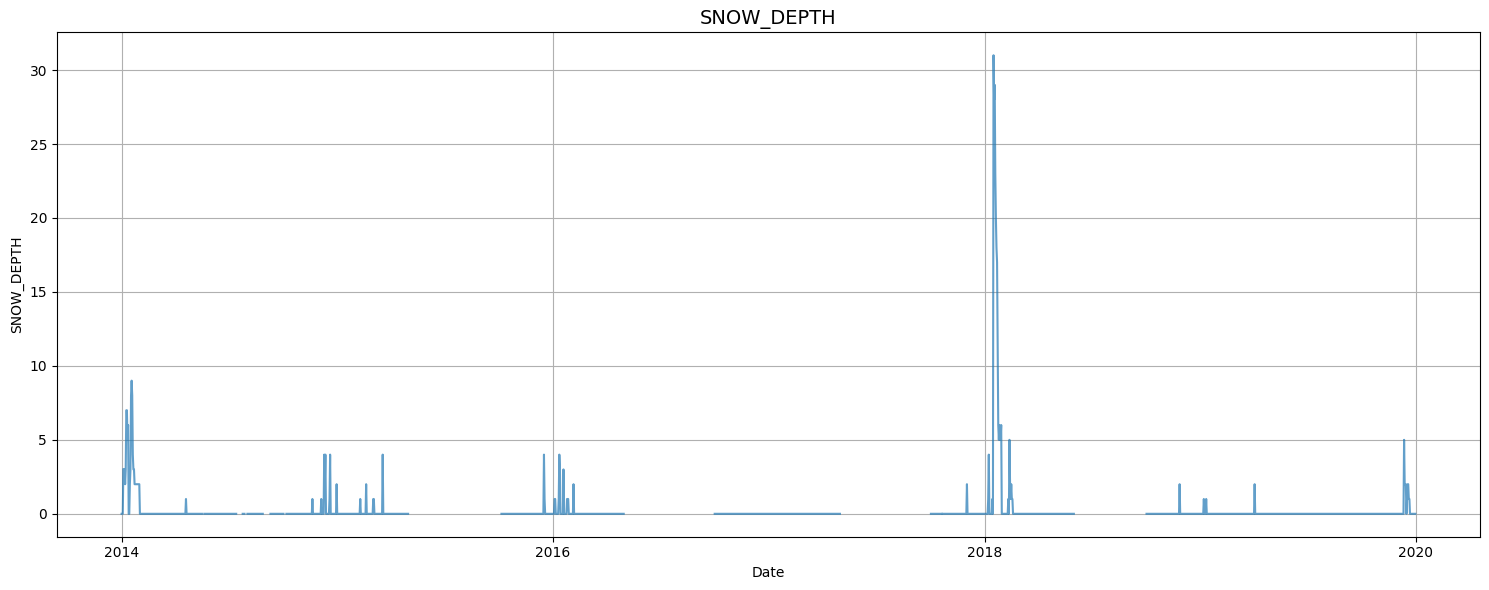

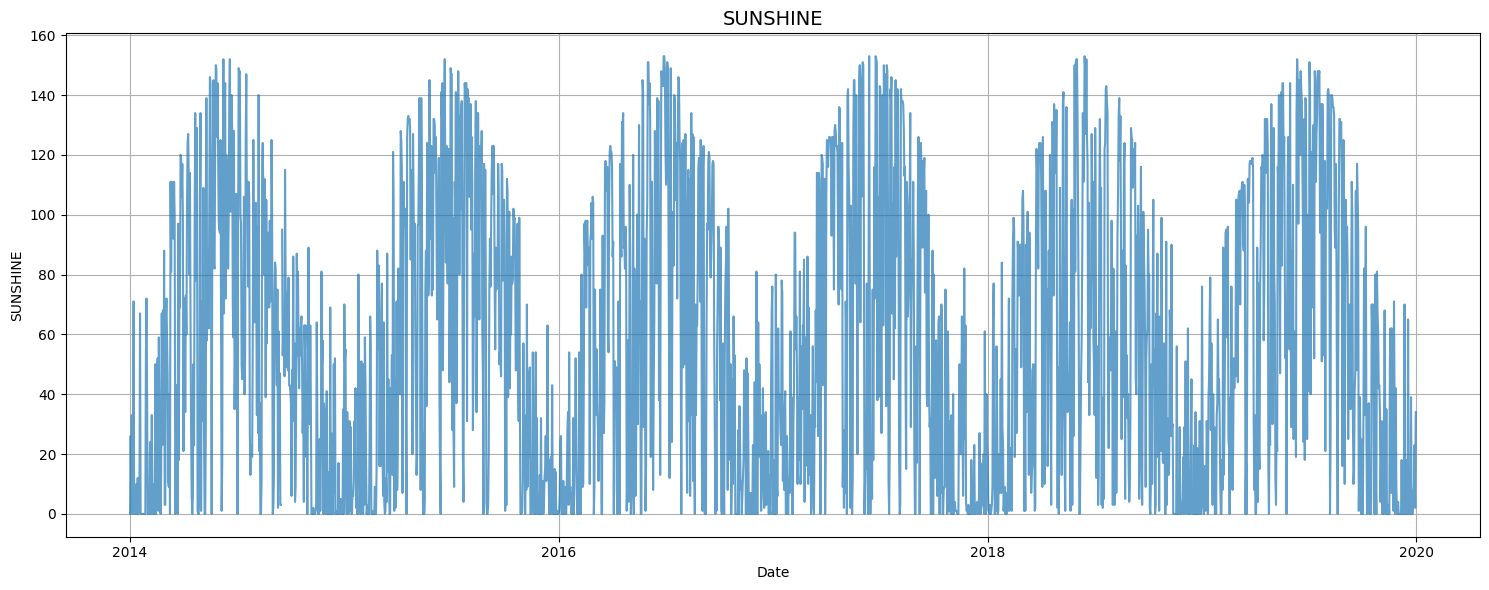

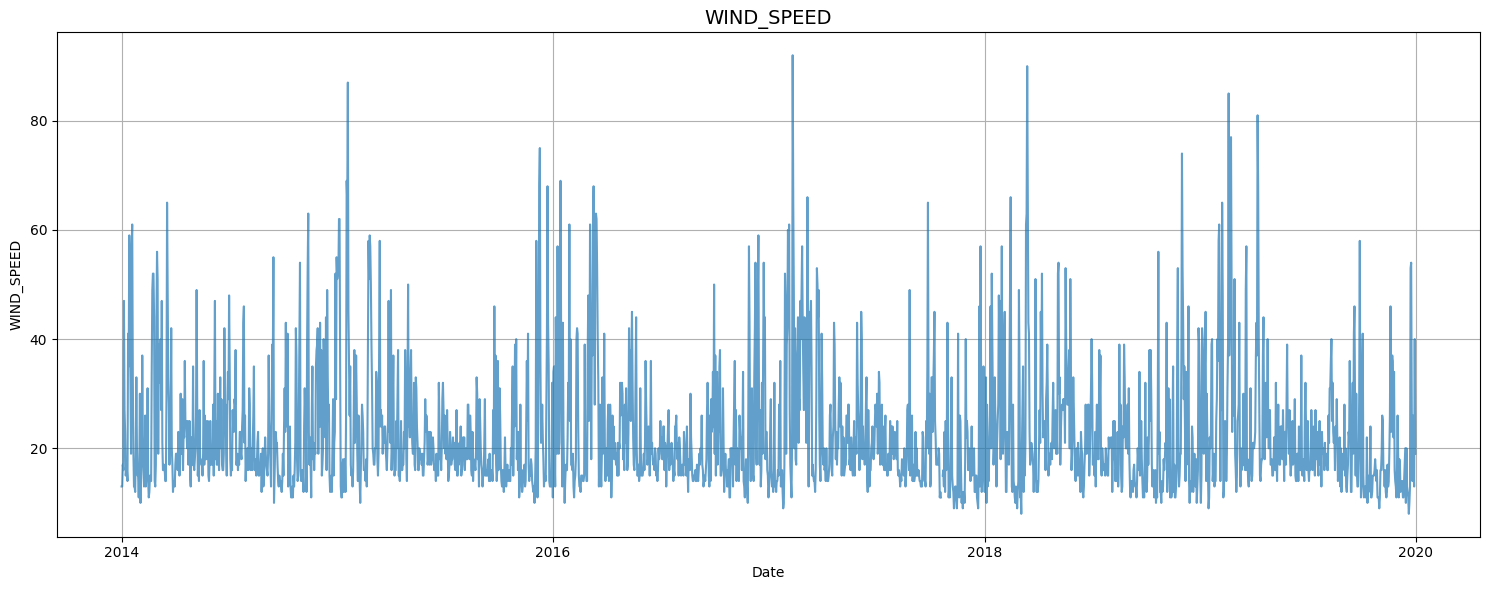

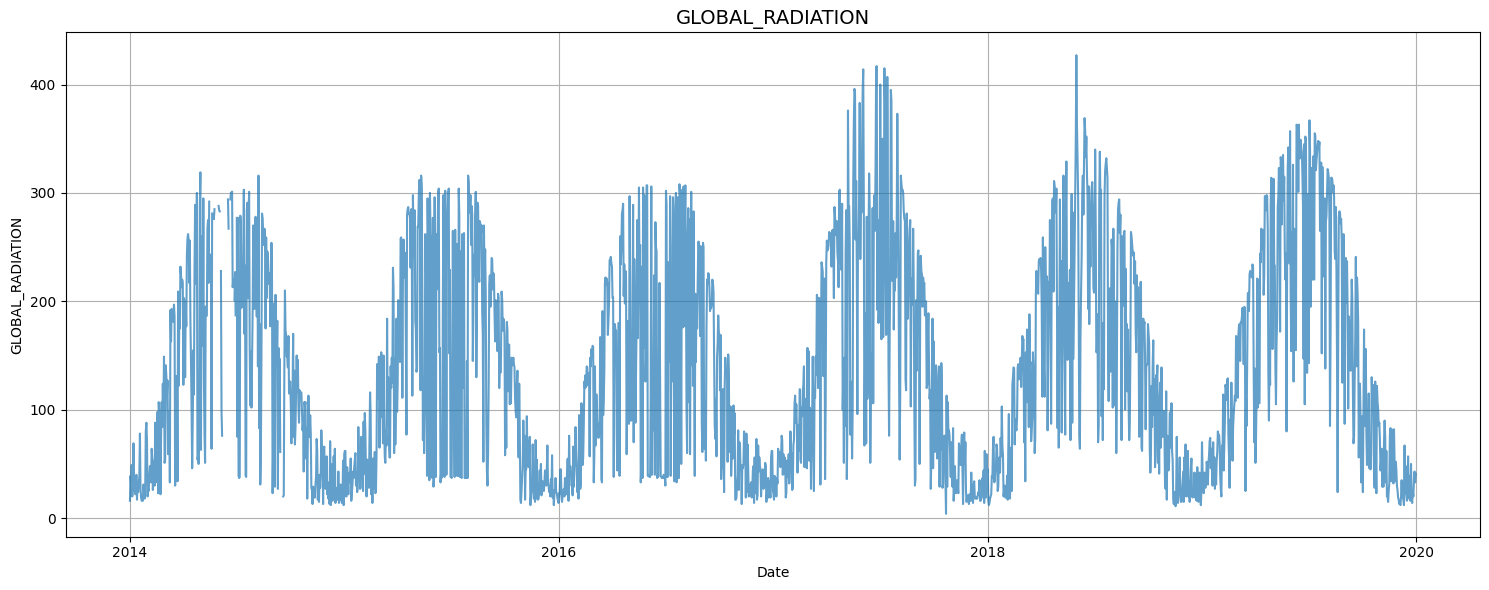

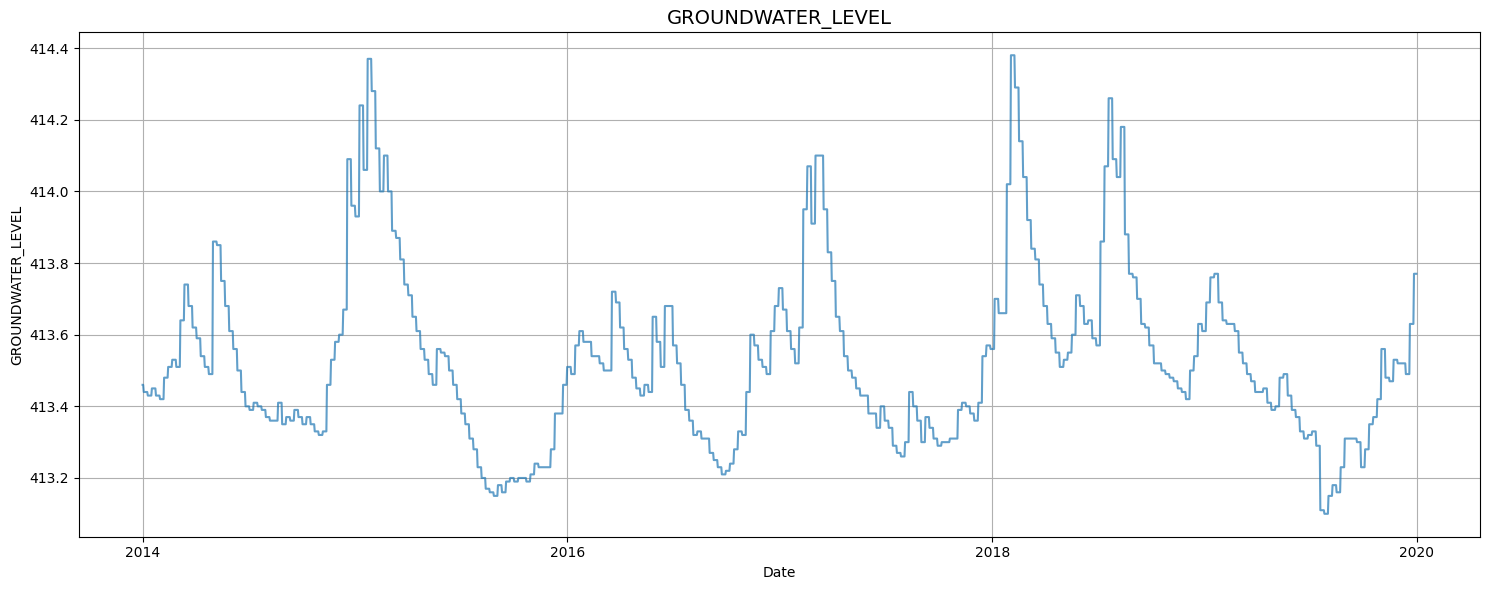

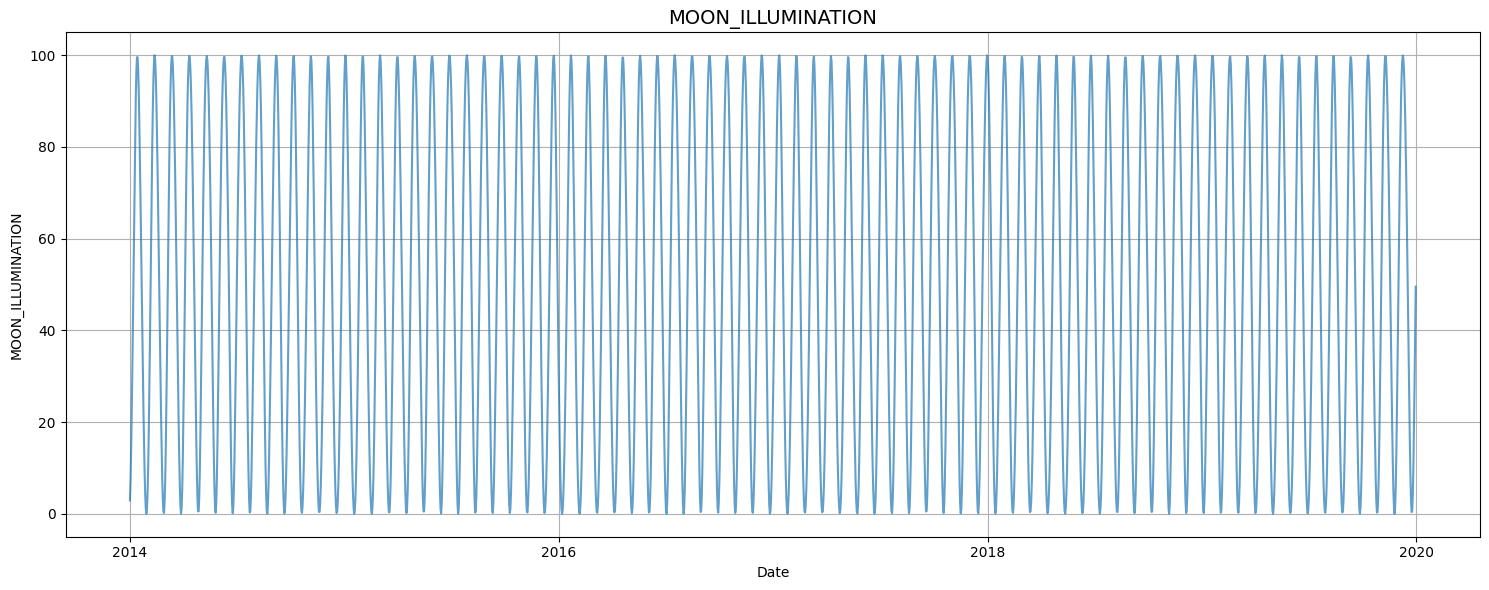

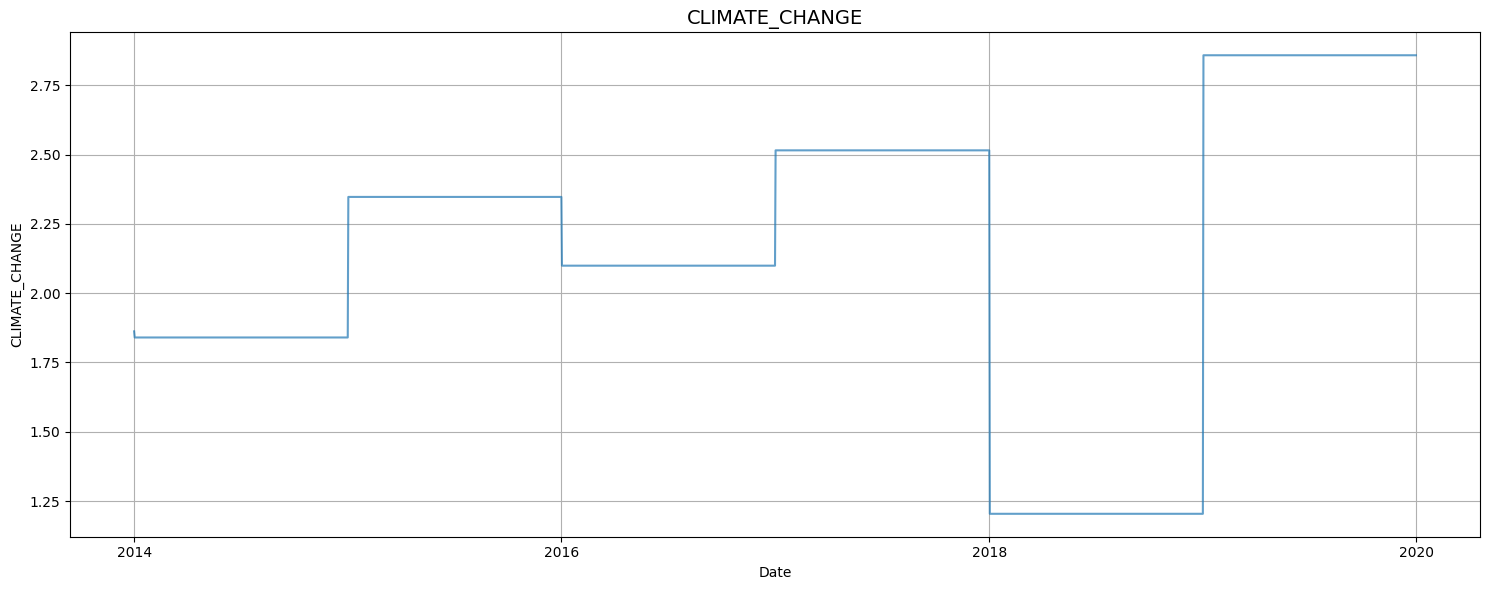

In [ ]:
#filter for years that looked weird:
filtered_data2 = filtered_data[(filtered_data['DATE'] >= '2017-01-01') & (filtered_data['DATE'] <= '2022-12-31')]

#do same as before for newly filtered data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

columns_to_plot = filtered_data2.columns[1:-7]
filtered_data.set_index('DATE', inplace=True)

for column in columns_to_plot:
    plt.figure(figsize=(15, 6))
    plt.plot(filtered_data2.index, filtered_data2[column], alpha=0.7)
    plt.title(f"{column}", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel(column)
    # Format the x-axis to show years (every 2 years)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
#looks normal for years around 2020 -> proceed with search for outliers

#don't want date as index anymore becuase used as column
filtered_data2.reset_index(inplace=True)


In [ ]:
filtered_data.reset_index(inplace=True)
# Find values outside the range 9000 to 12000
out_of_range = filtered_data[(filtered_data['PRESSURE'] < 9000) | (filtered_data['PRESSURE'] > 12000)]

# Check if there are any out-'of-range values
if not out_of_range.empty:
    print("Values outside the range 9000 to 12000 found:")
    print(out_of_range[['DATE', 'PRESSURE']])  # Adjust columns as needed
else:
    print("All values in PRESSURE are within the range 9000 to 12000.")




Values outside the range 9000 to 12000 found:
            DATE  PRESSURE
18414 2023-06-02    7598.0


In [ ]:
wind_outliers = filtered_data[(filtered_data['WIND_SPEED'] < 0) | (filtered_data['WIND_SPEED'] > 120)]

# Check if there are any out-of-range values
if not wind_outliers.empty:
    print("Values outside the range 0 to 120 found:")
    print(wind_outliers[['DATE', 'WIND_SPEED']])  # Adjust columns as needed
else:
    print("All values in WIND_SPEED are within the range 0 to 120.")

Values outside the range 0 to 120 found:
           DATE  WIND_SPEED
7712 1994-02-12       124.0
7713 1994-02-13       152.0


In [ ]:
#search for missing data:
nans_per_column = filtered_data.isna().sum()
print("NaNs per column:")
print(nans_per_column)
#see which have cols na's

NaNs per column:
DATE                   0
WATER_LEVEL            0
HUMIDITY               0
MEAN_TEMP              0
PRECIPITATION          0
PRESSURE               2
SNOW_DEPTH           629
SUNSHINE              49
WIND_SPEED             7
GLOBAL_RADIATION     104
GROUNDWATER_LEVEL      0
MOON_ILLUMINATION      0
CLIMATE_CHANGE         0
WATER_LEVEL_LAG_1      0
WATER_LEVEL_LAG_2      0
WATER_LEVEL_LAG_3      0
WATER_LEVEL_LAG_4      0
WATER_LEVEL_LAG_5      0
WATER_LEVEL_LAG_6      0
WATER_LEVEL_LAG_7      0
dtype: int64


In [ ]:
#print number of rows to ensure that snow_depth missing values aren't too much
total_rows = len(filtered_data)
print(f"Total number of rows: {total_rows}")
#show same with percentage:
missing_percentage = (filtered_data.isna().sum() / total_rows) * 100
print("Percentage of missing values per column:")
print(missing_percentage)
#see no more than 3% na'n -> will fill them after splitting to ensure no leaked data

Total number of rows: 18627
Percentage of missing values per column:
DATE                 0.000000
WATER_LEVEL          0.000000
HUMIDITY             0.000000
MEAN_TEMP            0.000000
PRECIPITATION        0.000000
PRESSURE             0.010737
SNOW_DEPTH           3.376819
SUNSHINE             0.263059
WIND_SPEED           0.037580
GLOBAL_RADIATION     0.558329
GROUNDWATER_LEVEL    0.000000
MOON_ILLUMINATION    0.000000
CLIMATE_CHANGE       0.000000
WATER_LEVEL_LAG_1    0.000000
WATER_LEVEL_LAG_2    0.000000
WATER_LEVEL_LAG_3    0.000000
WATER_LEVEL_LAG_4    0.000000
WATER_LEVEL_LAG_5    0.000000
WATER_LEVEL_LAG_6    0.000000
WATER_LEVEL_LAG_7    0.000000
dtype: float64


In [ ]:
nan_snow_depth_rows = filtered_data[filtered_data["SNOW_DEPTH"].isna()]
print(nan_snow_depth_rows)
#see especially september and november have NA's are not summer months-> can't just put 0 in there-> will afterwards take seasonal mean

            DATE  WATER_LEVEL  HUMIDITY  MEAN_TEMP  PRECIPITATION  PRESSURE  \
14919 2013-11-06        352.0      83.0       71.0           28.0   10025.0   
15952 2016-09-04        377.0      71.0      202.0            0.0   10192.0   
15953 2016-09-05        378.0      81.0      184.0           99.0   10174.0   
15954 2016-09-06        381.0      85.0      162.0           73.0   10216.0   
15955 2016-09-07        380.0      72.0      176.0            0.0   10247.0   
...          ...          ...       ...        ...            ...       ...   
17801 2021-09-27        357.0      88.0      169.0            0.0   10181.0   
17802 2021-09-28        355.0      87.0      164.0            4.0   10192.0   
17803 2021-09-29        353.0      79.0      150.0           23.0   10222.0   
17804 2021-09-30        350.0      74.0      146.0            3.0   10218.0   
17805 2021-10-01        348.0      72.0      110.0            0.0   10284.0   

       SNOW_DEPTH  SUNSHINE  WIND_SPEED  GLOBAL_RAD

In [ ]:
nan_pressure = filtered_data[filtered_data["PRESSURE"].isna()]
print(nan_pressure)

           DATE  WATER_LEVEL  HUMIDITY  MEAN_TEMP  PRECIPITATION  PRESSURE  \
4785 1986-02-07        277.0      81.0       -8.0            2.0       NaN   
5860 1989-01-17        290.0      93.0       22.0            0.0       NaN   

      SNOW_DEPTH  SUNSHINE  WIND_SPEED  GLOBAL_RADIATION  GROUNDWATER_LEVEL  \
4785         0.0       0.0        11.0              40.0             414.05   
5860         0.0       0.0         8.0              22.0             413.78   

      MOON_ILLUMINATION  CLIMATE_CHANGE  WATER_LEVEL_LAG_1  WATER_LEVEL_LAG_2  \
4785           11.73293           0.244              278.0              279.0   
5860           65.71941           1.147              292.0              294.0   

      WATER_LEVEL_LAG_3  WATER_LEVEL_LAG_4  WATER_LEVEL_LAG_5  \
4785              280.0              282.0              283.0   
5860              296.0              296.0              297.0   

      WATER_LEVEL_LAG_6  WATER_LEVEL_LAG_7  
4785              285.0              286.0

In [ ]:
nan_sunshine_rows = filtered_data[filtered_data["SUNSHINE"].isna()]
print(nan_sunshine_rows)

            DATE  WATER_LEVEL  HUMIDITY  MEAN_TEMP  PRECIPITATION  PRESSURE  \
9252  1998-05-02        309.0      77.0      122.0          121.0   10076.0   
9253  1998-05-03        312.0      91.0      104.0           14.0   10098.0   
9254  1998-05-04        313.0      72.0      129.0            0.0   10085.0   
9497  1999-01-02        298.0      91.0        1.0            0.0   10155.0   
9498  1999-01-03        297.0      91.0       12.0           18.0   10153.0   
9499  1999-01-04        295.0      79.0       65.0           13.0   10141.0   
9500  1999-01-05        294.0      81.0       93.0            4.0   10208.0   
9516  1999-01-21        284.0      98.0       -8.0            0.0   10279.0   
10000 2000-05-19        414.0      96.0      118.0           10.0   10124.0   
10001 2000-05-20        415.0      65.0      119.0            1.0   10126.0   
10002 2000-05-21        414.0      57.0      118.0            0.0   10130.0   
10003 2000-05-22        413.0      76.0      123.0  

In [ ]:

nan_windspeeed_rows = filtered_data[filtered_data["WIND_SPEED"].isna()]
print(nan_windspeeed_rows)

            DATE  WATER_LEVEL  HUMIDITY  MEAN_TEMP  PRECIPITATION  PRESSURE  \
7363  1993-02-28        267.0      70.0       -5.0            0.0   10133.0   
7364  1993-03-01        266.0      73.0       -5.0            0.0   10135.0   
7563  1993-09-16        379.0      74.0      140.0           65.0   10058.0   
9185  1998-02-24        261.0      98.0       36.0           19.0   10314.0   
10440 2001-08-02        424.0      59.0      248.0            0.0   10198.0   
17459 2020-10-20        369.0      91.0       70.0            0.0   10246.0   
17460 2020-10-21        366.0      95.0       65.0            0.0   10187.0   

       SNOW_DEPTH  SUNSHINE  WIND_SPEED  GLOBAL_RADIATION  GROUNDWATER_LEVEL  \
7363          0.0      50.0         NaN             124.0             413.69   
7364          0.0       0.0         NaN              52.0             413.69   
7563          0.0      57.0         NaN             188.0             413.58   
9185          0.0       0.0         NaN        

In [ ]:
nan_radiation_rows = filtered_data[filtered_data["GLOBAL_RADIATION"].isna()]
print(nan_radiation_rows)

            DATE  WATER_LEVEL  HUMIDITY  MEAN_TEMP  PRECIPITATION  PRESSURE  \
10000 2000-05-19        414.0      96.0      118.0           10.0   10124.0   
10001 2000-05-20        415.0      65.0      119.0            1.0   10126.0   
10002 2000-05-21        414.0      57.0      118.0            0.0   10130.0   
10003 2000-05-22        413.0      76.0      123.0          105.0   10104.0   
10004 2000-05-23        412.0      67.0      125.0            0.0   10174.0   
...          ...          ...       ...        ...            ...       ...   
16252 2017-07-01        383.0      61.0      175.0           24.0   10076.0   
16328 2017-09-15        411.0      70.0      130.0          109.0   10088.0   
16329 2017-09-16        409.0      95.0      110.0            0.0   10161.0   
16330 2017-09-17        409.0      79.0      110.0           13.0   10119.0   
16331 2017-09-18        407.0      85.0      110.0           43.0   10142.0   

       SNOW_DEPTH  SUNSHINE  WIND_SPEED  GLOBAL_RAD

In [ ]:
#want to predict 5 years -> model will be trained on past data (from 1972 until 2019) and then used to predict water levels for the years 2019–2023.
filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'])

train = filtered_data[filtered_data['DATE'] < '2018-01-01']
test = filtered_data[filtered_data['DATE'] >= '2018-01-01']

<ipython-input-209-06367d472781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'])


In [ ]:
filtered_data.head()

,DATE,WATER_LEVEL,HUMIDITY,MEAN_TEMP,PRECIPITATION,PRESSURE,SNOW_DEPTH,SUNSHINE,WIND_SPEED,GLOBAL_RADIATION,GROUNDWATER_LEVEL,MOON_ILLUMINATION,CLIMATE_CHANGE,WATER_LEVEL_LAG_1,WATER_LEVEL_LAG_2,WATER_LEVEL_LAG_3,WATER_LEVEL_LAG_4,WATER_LEVEL_LAG_5,WATER_LEVEL_LAG_6,WATER_LEVEL_LAG_7
0,1973-01-01,280.0,76.0,-22.0,0.0,10291.0,0.0,75.0,7.0,73.0,413.93,18.48788,-0.061,282.0,283.0,285.0,287.0,289.0,292.0,294.0
1,1973-01-02,279.0,83.0,-25.0,0.0,10263.0,0.0,23.0,10.0,46.0,413.93,11.76654,-0.056,280.0,282.0,283.0,285.0,287.0,289.0,292.0
2,1973-01-03,278.0,83.0,-9.0,0.0,10288.0,0.0,21.0,6.0,45.0,413.93,6.38749,-0.056,279.0,280.0,282.0,283.0,285.0,287.0,289.0
3,1973-01-04,277.0,80.0,0.0,0.0,10297.0,0.0,11.0,11.0,37.0,413.93,2.54398,-0.056,278.0,279.0,280.0,282.0,283.0,285.0,287.0
4,1973-01-05,275.0,83.0,-1.0,0.0,10331.0,0.0,8.0,21.0,34.0,413.93,0.40753,-0.056,277.0,278.0,279.0,280.0,282.0,283.0,285.0


In [ ]:
#verify split:
print("Training set:", train.shape)
print("Testing set:", test.shape)

Training set: (16436, 20)
Testing set: (2191, 20)


In [ ]:
train['DATE'] = pd.to_datetime(train['DATE'])
test['DATE'] = pd.to_datetime(test['DATE'])

<ipython-input-212-0ba533dca140>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DATE'] = pd.to_datetime(train['DATE'])
<ipython-input-212-0ba533dca140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['DATE'] = pd.to_datetime(test['DATE'])


In [ ]:
filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'])
target_date = "2023-06-02"
target_date = pd.to_datetime(target_date)
#perform rolling mean imputation: look that no data leakage-> is in test data but only take values of test data so should be okay
# take rolling mean rolling mean for the 30-day window
window_start = target_date - pd.Timedelta(days=15)
window_end = target_date + pd.Timedelta(days=15)

# Filter rows in the rolling window
rolling_window = filtered_data.loc[
    (filtered_data['DATE'] >= window_start) & (filtered_data['DATE'] <= window_end), "PRESSURE"
]

rolling_mean = rolling_window.mean()

# Replace the outlier in the test data and filtered data for the target date
test.loc[test['DATE'] == target_date, "PRESSURE"] = rolling_mean
filtered_data.loc[filtered_data['DATE'] == target_date, "PRESSURE"] = rolling_mean

<ipython-input-213-351b8d863838>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DATE'] = pd.to_datetime(filtered_data['DATE'])


In [ ]:
filtered_data.head()

,DATE,WATER_LEVEL,HUMIDITY,MEAN_TEMP,PRECIPITATION,PRESSURE,SNOW_DEPTH,SUNSHINE,WIND_SPEED,GLOBAL_RADIATION,GROUNDWATER_LEVEL,MOON_ILLUMINATION,CLIMATE_CHANGE,WATER_LEVEL_LAG_1,WATER_LEVEL_LAG_2,WATER_LEVEL_LAG_3,WATER_LEVEL_LAG_4,WATER_LEVEL_LAG_5,WATER_LEVEL_LAG_6,WATER_LEVEL_LAG_7
0,1973-01-01,280.0,76.0,-22.0,0.0,10291.0,0.0,75.0,7.0,73.0,413.93,18.48788,-0.061,282.0,283.0,285.0,287.0,289.0,292.0,294.0
1,1973-01-02,279.0,83.0,-25.0,0.0,10263.0,0.0,23.0,10.0,46.0,413.93,11.76654,-0.056,280.0,282.0,283.0,285.0,287.0,289.0,292.0
2,1973-01-03,278.0,83.0,-9.0,0.0,10288.0,0.0,21.0,6.0,45.0,413.93,6.38749,-0.056,279.0,280.0,282.0,283.0,285.0,287.0,289.0
3,1973-01-04,277.0,80.0,0.0,0.0,10297.0,0.0,11.0,11.0,37.0,413.93,2.54398,-0.056,278.0,279.0,280.0,282.0,283.0,285.0,287.0
4,1973-01-05,275.0,83.0,-1.0,0.0,10331.0,0.0,8.0,21.0,34.0,413.93,0.40753,-0.056,277.0,278.0,279.0,280.0,282.0,283.0,285.0


In [ ]:
# Check for values below 9000 in the PRESSURE column
pressure_below_9000 = filtered_data[filtered_data['PRESSURE'] < 9000]

# Display the results
if not pressure_below_9000.empty:
    print("Pressure values below 9000 found:")
    print(pressure_below_9000[['PRESSURE']])
else:
    print("No pressure values below 9000.")

No pressure values below 9000.


In [ ]:
#both windspeed anomalies are in training split 5
# Define target dates for imputation
target_dates = ["1994-02-12", "1994-02-13"]
target_dates = pd.to_datetime(target_dates)

for target_date in target_dates:
    target_date = pd.to_datetime(target_date)

    # Compute the rolling mean for a 30-day window around the target date
    window_start = target_date - pd.Timedelta(days=15)
    window_end = target_date + pd.Timedelta(days=15)

    # Use only test data within the rolling window
    rolling_window = filtered_data.loc[
    (filtered_data['DATE'] >= window_start) & (filtered_data['DATE'] <= window_end), "WIND_SPEED"
    ]

    rolling_mean = rolling_window.mean()

  # Replace the outlier in the test data with the computed rolling mean
    train.loc[train['DATE'] == target_date, "WIND_SPEED"] = rolling_mean
    filtered_data.loc[filtered_data['DATE'] == target_date, "WIND_SPEED"] = rolling_mean



In [ ]:
# Check for values outside the range 0 to 120 in the WIND_SPEED column
wind_speed_out_of_range_train = train[
    (train['WIND_SPEED'] < 0) | (train['WIND_SPEED'] > 120)
]

wind_speed_out_of_range_filtered = filtered_data[
    (filtered_data['WIND_SPEED'] < 0) | (filtered_data['WIND_SPEED'] > 120)
]

# Display the results
if not wind_speed_out_of_range_train.empty:
    print("Wind speed values outside the range 0 to 120 found:")
    print(wind_speed_out_of_range_train[['WIND_SPEED']])
else:
    print("All wind speed values are within the range 0 to 120.")
if not wind_speed_out_of_range_filtered.empty:
    print("Wind speed values outside the range 0 to 120 found:")
    print(wind_speed_out_of_range_filtered[['WIND_SPEED']])
else:
    print("All wind speed values are within the range 0 to 120.")


All wind speed values are within the range 0 to 120.
All wind speed values are within the range 0 to 120.


In [ ]:
#handle missing data with seasonal mean imputation: take mean from the same months of other years (for test and training data seperately)
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
filtered_data.index = pd.to_datetime(filtered_data.index)

#Columns where data was missing
columns = ['PRESSURE', 'SNOW_DEPTH', 'SUNSHINE', 'WIND_SPEED', 'GLOBAL_RADIATION']

# Compute monthly seasonal means over the entire concatenated train and test periods
train_monthly_means = train.groupby(train.index.month)[columns].mean()
test_monthly_means = test.groupby(test.index.month)[columns].mean()

# Impute NaNs in train data and update filtered data simultaneously
for column in columns:
    for month, mean_value in train_monthly_means[column].items():
        month_mask = train.index.month == month

        # Fill NaNs
        train.loc[month_mask, column] = train.loc[month_mask, column].fillna(mean_value)
        filtered_data.loc[train.index[month_mask], column] = filtered_data.loc[train.index[month_mask], column].fillna(mean_value)

# Impute NaNs in test data and update filtered data simultaneously
for column in columns:
    for month, mean_value in test_monthly_means[column].items():
        month_mask = test.index.month == month

        # Fill NaNs
        test.loc[month_mask, column] = test.loc[month_mask, column].fillna(mean_value)
        filtered_data.loc[test.index[month_mask], column] = filtered_data.loc[test.index[month_mask], column].fillna(mean_value)



In [ ]:
#check if all NAN's have a value now:
#search for missing data:
nans_test_data = test.isna().sum()
print("NaNs in test data per column:")
print(nans_test_data)
#see which have cols na's
nans_train_data = train.isna().sum()
print("NaNs in train data per column:")
print(nans_train_data)

nans_filtered_data = filtered_data.isna().sum()
print("NaNs in test data per column:")
print(nans_filtered_data)
#have no NA's in all test and train data splits

NaNs in test data per column:
DATE                 0
WATER_LEVEL          0
HUMIDITY             0
MEAN_TEMP            0
PRECIPITATION        0
PRESSURE             0
SNOW_DEPTH           0
SUNSHINE             0
WIND_SPEED           0
GLOBAL_RADIATION     0
GROUNDWATER_LEVEL    0
MOON_ILLUMINATION    0
CLIMATE_CHANGE       0
WATER_LEVEL_LAG_1    0
WATER_LEVEL_LAG_2    0
WATER_LEVEL_LAG_3    0
WATER_LEVEL_LAG_4    0
WATER_LEVEL_LAG_5    0
WATER_LEVEL_LAG_6    0
WATER_LEVEL_LAG_7    0
dtype: int64
NaNs in train data per column:
DATE                 0
WATER_LEVEL          0
HUMIDITY             0
MEAN_TEMP            0
PRECIPITATION        0
PRESSURE             0
SNOW_DEPTH           0
SUNSHINE             0
WIND_SPEED           0
GLOBAL_RADIATION     0
GROUNDWATER_LEVEL    0
MOON_ILLUMINATION    0
CLIMATE_CHANGE       0
WATER_LEVEL_LAG_1    0
WATER_LEVEL_LAG_2    0
WATER_LEVEL_LAG_3    0
WATER_LEVEL_LAG_4    0
WATER_LEVEL_LAG_5    0
WATER_LEVEL_LAG_6    0
WATER_LEVEL_LAG_7    0
dtype:

In [ ]:
#recheck if concatenated correctly
print(test.head())
print(train.head())

                                    DATE  WATER_LEVEL  HUMIDITY  MEAN_TEMP  \
1970-01-01 00:00:00.000016436 2018-01-01        338.0      66.0      105.0   
1970-01-01 00:00:00.000016437 2018-01-02        338.0      71.0       67.0   
1970-01-01 00:00:00.000016438 2018-01-03        338.0      72.0       49.0   
1970-01-01 00:00:00.000016439 2018-01-04        342.0      78.0       64.0   
1970-01-01 00:00:00.000016440 2018-01-05        355.0      86.0       77.0   

                               PRECIPITATION  PRESSURE  SNOW_DEPTH  SUNSHINE  \
1970-01-01 00:00:00.000016436           10.0   10136.0         0.0      70.0   
1970-01-01 00:00:00.000016437           33.0   10107.0         0.0      51.0   
1970-01-01 00:00:00.000016438            3.0   10167.0         0.0      55.0   
1970-01-01 00:00:00.000016439           68.0   10073.0         0.0       9.0   
1970-01-01 00:00:00.000016440          155.0   10051.0         0.0       0.0   

                               WIND_SPEED  GLOBAL_

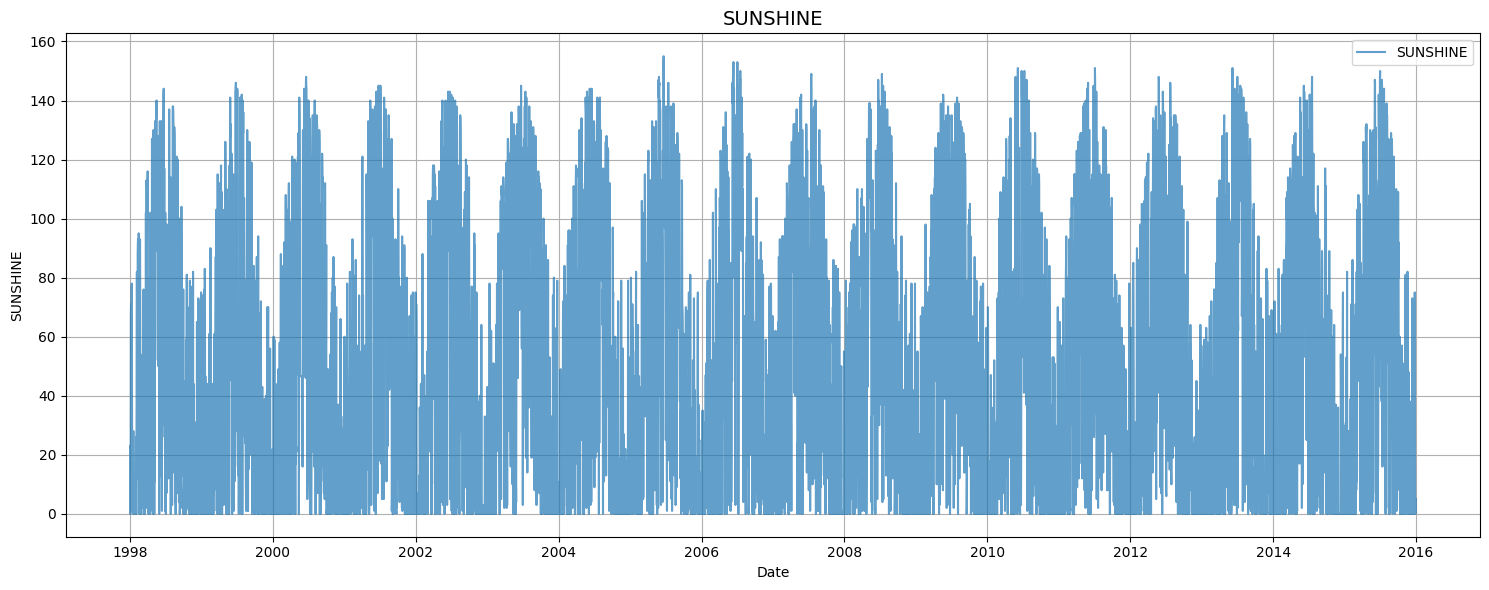

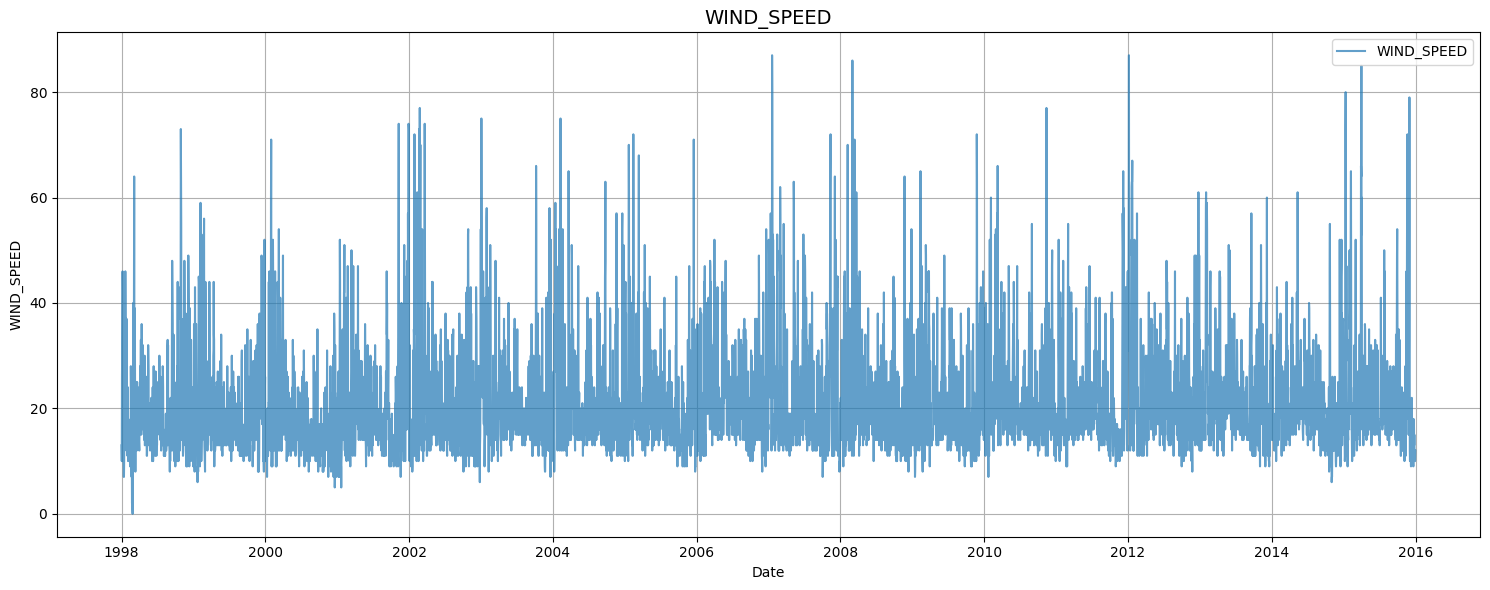

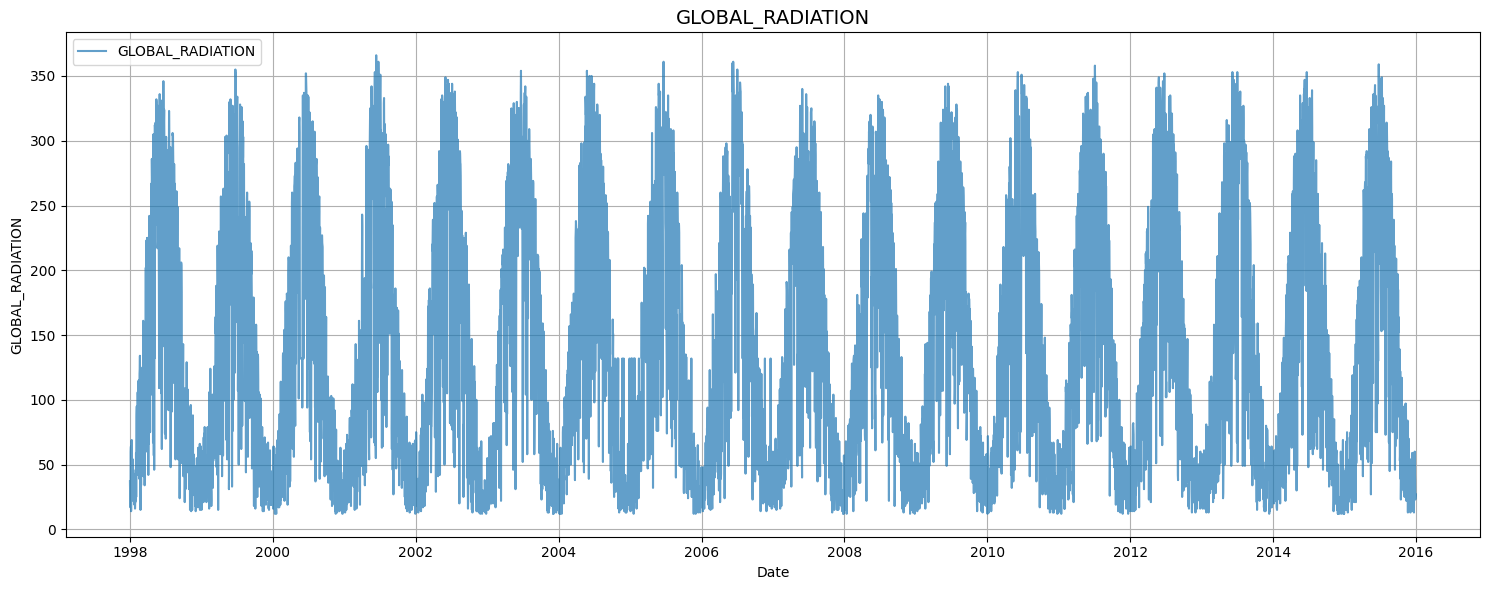

In [ ]:
#plot again to see if everything looks fin (plot window 1998 - 2015 because had many missing values there, except for pressure which is plotted seperately)
#filtered_data.reset_index(inplace=True)

filtered_data3 = filtered_data[(filtered_data['DATE'] >= '1998-01-01') & (filtered_data['DATE'] <= '2015-12-31')]
columns_to_plot = filtered_data3.columns[7:-10]

filtered_data3.set_index('DATE', inplace=True)

for column in columns_to_plot:
    plt.figure(figsize=(15, 6))
    plt.plot(filtered_data3.index, filtered_data3[column], alpha=0.7, label=column)
    plt.title(f"{column}", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel(column)

    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Reset the index so 'DATE' is a column again
filtered_data3.reset_index(inplace=True)

In [ ]:
filtered_data.to_csv('../data/processed/filtered_data.csv', index=False)
test.to_csv('../data/processed/final_train_data.csv', index=False)
train.to_csv('../data/processed/final_test_data.csv', index=False)

